In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 글꼴 설정 
plt.rcParams.update({'font.family':'Malgun Gothic','font.size':12}) #차트 글꼴 설정
plt.rc('axes',unicode_minus=False) #유니코드에서 음수 부호설정

font2 = {'family': 'Times New Roman',
      'color':  'blue',
      'weight': 'bold',
      'size': 12,
      'alpha': 0.7}

In [15]:
liver = pd.read_csv("경기도하천현황.csv", encoding="cp949")
liver

,하천명,하천등급,기점위치,기점경계위치,종점위치,종점경계위치,하천지정일자,하천고시일내역,하천지정근거,본류명,...,4지류명,5지류명,6지류명,유로연장(km),유역면적(㎢),제방정비완료구간연장(km),제방보강필요구간연장(km),제방신설필요구간연장(km),하천구간연장(km),하천미수립구간연장(km)
0,두밀천,지방,경기가평가평,두밀리,경기가평가평,달전천(지방) 합류점,1965-03-01,2009-06-02,경기3148호,한강,...,NaN,NaN,NaN,2.10,7.20,NaN,NaN,NaN,2.10,NaN
1,두포천,지방,경기파주법원,금곡리,경기파주파평,임진강(국가) 합류점,1965-03-01,2004-02-27,경기3148호,한강,...,NaN,NaN,NaN,7.05,17.50,5.36,1.46,3.77,7.05,NaN
2,둔포천,지방,경기평택팽성,"안성천(국가)합류 점(경기,충남도계)",경기평택팽성,안성천(국가) 합류점,NaN,2008-11-07,NaN,안성천,...,NaN,NaN,NaN,3.90,NaN,3.14,0.25,4.18,3.90,NaN
3,마거천,지방,경기연천중,적접지역,경기연천중,임진강(국가) 합류점,1965-03-01,NaN,경기3148호,한강,...,NaN,NaN,NaN,NaN,40.83,4.00,7.60,NaN,NaN,11.6
4,마북천,지방,경기용인마성,마북리,경기용인구성,탄천(지방) 합류점,1965-03-01,2007-11-15,경기3148호,한강,...,NaN,NaN,NaN,3.73,4.43,NaN,2.30,4.42,3.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,황공천,지방,경기연천미산,백석리,경기연천미산,임진강(국가) 합류점,1965-03-01,2004-02-27,경기3148호,한강,...,NaN,NaN,NaN,5.89,23.88,5.22,0.35,3.78,5.89,NaN
513,황구지천,지방,경기의왕초평동,NaN,경기화성황계동,신대황교(황구지천(국가)합류점,NaN,2014-09-30,대통령령 제16535호,안성천,...,NaN,NaN,NaN,13.04,84.75,0.16,0.03,25.84,13.04,NaN
514,회룡천,지방,경기의정부호원,호원동,경기의정부호원,중랑천(지방) 합류점,1965-03-01,2012-12-26,경기3148호,한강,...,NaN,NaN,NaN,1.70,3.14,1.55,NaN,NaN,1.70,NaN
515,회암천,지방,경기양주회천4,송암리,경기양주회천1,청담천(지방) 합류점,1965-03-01,2011-05-26,경기3148호,한강,...,청담천,회암천,NaN,5.40,20.51,3.78,1.40,NaN,5.40,NaN


In [16]:
liver =liver[liver['기점위치'].str.contains('성남') | liver['종점위치'].str.contains('성남')]
liver

,하천명,하천등급,기점위치,기점경계위치,종점위치,종점경계위치,하천지정일자,하천고시일내역,하천지정근거,본류명,...,4지류명,5지류명,6지류명,유로연장(km),유역면적(㎢),제방정비완료구간연장(km),제방보강필요구간연장(km),제방신설필요구간연장(km),하천구간연장(km),하천미수립구간연장(km)
35,상적천,지방,경기성남고등,고등리,경기성남둔전,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,NaN,NaN,NaN,2.52,11.04,4.26,0.78,NaN,2.52,NaN
90,신남천,지방,경기화성남양,신남리,경기화성남양,해안,1965-03-01,2009-08-10,경기3148호,남양천,...,NaN,NaN,NaN,1.81,4.23,1.07,2.39,NaN,1.81,NaN
136,분당천,지방,경기성남분당,분당리,경기성남수내,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,NaN,NaN,NaN,3.62,11.89,7.09,0.15,NaN,3.62,NaN
179,운중천,지방,경기성남운중,운중동,경기성남이매,탄천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,...,NaN,NaN,NaN,7.98,24.91,14.35,0.75,NaN,7.98,NaN
255,금토천,지방,경기성남삼평,삼평동,경기성남 분당판교,운중천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,...,NaN,NaN,NaN,3.07,9.77,4.37,0.46,0.81,3.07,NaN
263,남양천,지방,경기화성남양,봉양리,경기화성남양,해안,1965-03-01,2009-08-10,경기3148호,남양천,...,NaN,NaN,NaN,5.07,19.61,2.00,7.73,NaN,5.07,NaN
381,야탑천,지방,경기성남야탑,야탑리,경기성남 분당야탑,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,NaN,NaN,NaN,2.68,4.65,5.37,NaN,NaN,2.68,NaN
403,여수천,지방,경기성남 중원갈현,갈현,경기성남 분당야탑,탄천(지방) 합류점,1965-03-01,2009-04-15,경기3148호,한강,...,NaN,NaN,NaN,4.03,9.85,3.92,0.85,2.98,4.03,NaN
437,동막천,지방,경기성남 분당대장,대장리,경기성남구미,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,NaN,NaN,NaN,7.12,29.34,4.33,4.64,0.73,7.12,NaN
478,탄천,지방,경기용인청덕,BOX교,경기성남수정복정,세곡천합류점,NaN,2014-10-01,NaN,한강,...,NaN,NaN,NaN,24.35,NaN,37.06,2.48,NaN,24.35,NaN


In [17]:
liver.isnull().sum()

하천명                0
하천등급               0
기점위치               0
기점경계위치             0
종점위치               0
종점경계위치             0
하천지정일자             1
하천고시일내역            0
하천지정근거             1
본류명                0
1지류명               1
2지류명               3
3지류명               9
4지류명              10
5지류명              10
6지류명              10
유로연장(km)           0
유역면적(㎢)            1
제방정비완료구간연장(km)     0
제방보강필요구간연장(km)     1
제방신설필요구간연장(km)     7
하천구간연장(km)         0
하천미수립구간연장(km)     10
dtype: int64

In [18]:
liver1 = liver.drop(['3지류명', '4지류명','5지류명','6지류명','하천미수립구간연장(km)'], axis=1)

In [19]:
liver1 = liver1.reset_index(drop= True)

In [20]:
liver1= liver1.drop([1,5], axis=0)
liver1

,하천명,하천등급,기점위치,기점경계위치,종점위치,종점경계위치,하천지정일자,하천고시일내역,하천지정근거,본류명,1지류명,2지류명,유로연장(km),유역면적(㎢),제방정비완료구간연장(km),제방보강필요구간연장(km),제방신설필요구간연장(km),하천구간연장(km)
0,상적천,지방,경기성남고등,고등리,경기성남둔전,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,상적천,2.52,11.04,4.26,0.78,NaN,2.52
2,분당천,지방,경기성남분당,분당리,경기성남수내,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,분당천,3.62,11.89,7.09,0.15,NaN,3.62
3,운중천,지방,경기성남운중,운중동,경기성남이매,탄천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,탄천,운중천,7.98,24.91,14.35,0.75,NaN,7.98
4,금토천,지방,경기성남삼평,삼평동,경기성남 분당판교,운중천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,탄천,운중천,3.07,9.77,4.37,0.46,0.81,3.07
6,야탑천,지방,경기성남야탑,야탑리,경기성남 분당야탑,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,야탑천,2.68,4.65,5.37,NaN,NaN,2.68
7,여수천,지방,경기성남 중원갈현,갈현,경기성남 분당야탑,탄천(지방) 합류점,1965-03-01,2009-04-15,경기3148호,한강,탄천,여수천,4.03,9.85,3.92,0.85,2.98,4.03
8,동막천,지방,경기성남 분당대장,대장리,경기성남구미,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,동막천,7.12,29.34,4.33,4.64,0.73,7.12
9,탄천,지방,경기용인청덕,BOX교,경기성남수정복정,세곡천합류점,NaN,2014-10-01,NaN,한강,탄천,NaN,24.35,NaN,37.06,2.48,NaN,24.35


In [21]:
liver1['기점위치'] = liver1['기점위치'].str.replace(' ', '')

In [22]:
liver1['종점위치'] = liver1['종점위치'].str.replace(' ', '')

In [23]:
liver1['기점위치_구'] = liver1['기점위치'].str.slice(start=2, stop=4) 
liver1

,하천명,하천등급,기점위치,기점경계위치,종점위치,종점경계위치,하천지정일자,하천고시일내역,하천지정근거,본류명,1지류명,2지류명,유로연장(km),유역면적(㎢),제방정비완료구간연장(km),제방보강필요구간연장(km),제방신설필요구간연장(km),하천구간연장(km),기점위치_구
0,상적천,지방,경기성남고등,고등리,경기성남둔전,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,상적천,2.52,11.04,4.26,0.78,NaN,2.52,성남
2,분당천,지방,경기성남분당,분당리,경기성남수내,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,분당천,3.62,11.89,7.09,0.15,NaN,3.62,성남
3,운중천,지방,경기성남운중,운중동,경기성남이매,탄천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,탄천,운중천,7.98,24.91,14.35,0.75,NaN,7.98,성남
4,금토천,지방,경기성남삼평,삼평동,경기성남분당판교,운중천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,탄천,운중천,3.07,9.77,4.37,0.46,0.81,3.07,성남
6,야탑천,지방,경기성남야탑,야탑리,경기성남분당야탑,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,야탑천,2.68,4.65,5.37,NaN,NaN,2.68,성남
7,여수천,지방,경기성남중원갈현,갈현,경기성남분당야탑,탄천(지방) 합류점,1965-03-01,2009-04-15,경기3148호,한강,탄천,여수천,4.03,9.85,3.92,0.85,2.98,4.03,성남
8,동막천,지방,경기성남분당대장,대장리,경기성남구미,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,동막천,7.12,29.34,4.33,4.64,0.73,7.12,성남
9,탄천,지방,경기용인청덕,BOX교,경기성남수정복정,세곡천합류점,NaN,2014-10-01,NaN,한강,탄천,NaN,24.35,NaN,37.06,2.48,NaN,24.35,용인


In [24]:
liver1['기점위치_동'] = liver1['기점위치'].str.slice(start=4, stop=6) 
liver1

,하천명,하천등급,기점위치,기점경계위치,종점위치,종점경계위치,하천지정일자,하천고시일내역,하천지정근거,본류명,1지류명,2지류명,유로연장(km),유역면적(㎢),제방정비완료구간연장(km),제방보강필요구간연장(km),제방신설필요구간연장(km),하천구간연장(km),기점위치_구,기점위치_동
0,상적천,지방,경기성남고등,고등리,경기성남둔전,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,상적천,2.52,11.04,4.26,0.78,NaN,2.52,성남,고등
2,분당천,지방,경기성남분당,분당리,경기성남수내,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,분당천,3.62,11.89,7.09,0.15,NaN,3.62,성남,분당
3,운중천,지방,경기성남운중,운중동,경기성남이매,탄천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,탄천,운중천,7.98,24.91,14.35,0.75,NaN,7.98,성남,운중
4,금토천,지방,경기성남삼평,삼평동,경기성남분당판교,운중천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,탄천,운중천,3.07,9.77,4.37,0.46,0.81,3.07,성남,삼평
6,야탑천,지방,경기성남야탑,야탑리,경기성남분당야탑,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,야탑천,2.68,4.65,5.37,NaN,NaN,2.68,성남,야탑
7,여수천,지방,경기성남중원갈현,갈현,경기성남분당야탑,탄천(지방) 합류점,1965-03-01,2009-04-15,경기3148호,한강,탄천,여수천,4.03,9.85,3.92,0.85,2.98,4.03,성남,중원
8,동막천,지방,경기성남분당대장,대장리,경기성남구미,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,탄천,동막천,7.12,29.34,4.33,4.64,0.73,7.12,성남,분당
9,탄천,지방,경기용인청덕,BOX교,경기성남수정복정,세곡천합류점,NaN,2014-10-01,NaN,한강,탄천,NaN,24.35,NaN,37.06,2.48,NaN,24.35,용인,청덕


In [25]:
liver1['종점위치_구'] = liver1['종점위치'].str.slice(start=2, stop=4) 
liver1['종점위치_동'] = liver1['종점위치'].str.slice(start=4, stop=6) 


In [26]:
liver1 = liver1.reset_index(drop= True)
liver1

,하천명,하천등급,기점위치,기점경계위치,종점위치,종점경계위치,하천지정일자,하천고시일내역,하천지정근거,본류명,...,유로연장(km),유역면적(㎢),제방정비완료구간연장(km),제방보강필요구간연장(km),제방신설필요구간연장(km),하천구간연장(km),기점위치_구,기점위치_동,종점위치_구,종점위치_동
0,상적천,지방,경기성남고등,고등리,경기성남둔전,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,2.52,11.04,4.26,0.78,NaN,2.52,성남,고등,성남,둔전
1,분당천,지방,경기성남분당,분당리,경기성남수내,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,3.62,11.89,7.09,0.15,NaN,3.62,성남,분당,성남,수내
2,운중천,지방,경기성남운중,운중동,경기성남이매,탄천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,...,7.98,24.91,14.35,0.75,NaN,7.98,성남,운중,성남,이매
3,금토천,지방,경기성남삼평,삼평동,경기성남분당판교,운중천(지방) 합류점,1965-03-01,2006-11-15,경기3148호,한강,...,3.07,9.77,4.37,0.46,0.81,3.07,성남,삼평,성남,분당
4,야탑천,지방,경기성남야탑,야탑리,경기성남분당야탑,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,2.68,4.65,5.37,NaN,NaN,2.68,성남,야탑,성남,분당
5,여수천,지방,경기성남중원갈현,갈현,경기성남분당야탑,탄천(지방) 합류점,1965-03-01,2009-04-15,경기3148호,한강,...,4.03,9.85,3.92,0.85,2.98,4.03,성남,중원,성남,분당
6,동막천,지방,경기성남분당대장,대장리,경기성남구미,탄천(지방) 합류점,1965-03-01,2001-05-02,경기3148호,한강,...,7.12,29.34,4.33,4.64,0.73,7.12,성남,분당,성남,구미
7,탄천,지방,경기용인청덕,BOX교,경기성남수정복정,세곡천합류점,NaN,2014-10-01,NaN,한강,...,24.35,NaN,37.06,2.48,NaN,24.35,용인,청덕,성남,수정


In [29]:
liver1.iloc[5]['기점위치_구'] = (liver1.iloc[5][2]).str.slice(start=6, stop=8) 

AttributeError: 'str' object has no attribute 'str'

In [33]:
liver_ga = liver1.iloc[5][2]
liver_ga

'경기성남중원갈현'

In [71]:
jungwon_liver = pd.read_csv("jungwon_liver.csv")
jungwon_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,보통천,0.48,0.450,100.0,0.937500,0.577350,0.135101
1,갈현천,3.16,2.400,78.3,0.759494,-1.154701,-1.060682
2,도촌천,2.03,2.142,100.0,1.055172,0.577350,0.925582


In [35]:
bundang_liver = pd.read_csv("bundang_liver.csv")
bundang_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,탄천,145.74,15.700,100.0,0.107726,0.998679,-1.189959
1,동막천,29.34,7.120,28.3,0.242672,-2.048919,-0.956108
2,분당천,11.89,3.620,100.0,0.304458,0.998679,-0.849038
3,운중천,24.91,8.000,86.7,0.321156,0.433365,-0.820101
4,금토천,9.77,3.070,37.1,0.314227,-1.674876,-0.832108
5,야탑천,4.65,2.690,100.0,0.578495,0.998679,-0.374153
6,여수천,9.85,4.030,80.6,0.409137,0.174085,-0.667637
7,이매1천,0.38,0.991,88.6,2.607895,0.514124,3.142641
8,이매2천,0.87,0.571,100.0,0.656322,0.998679,-0.239284
9,통도골천,0.97,0.663,63.2,0.683505,-0.565499,-0.192178


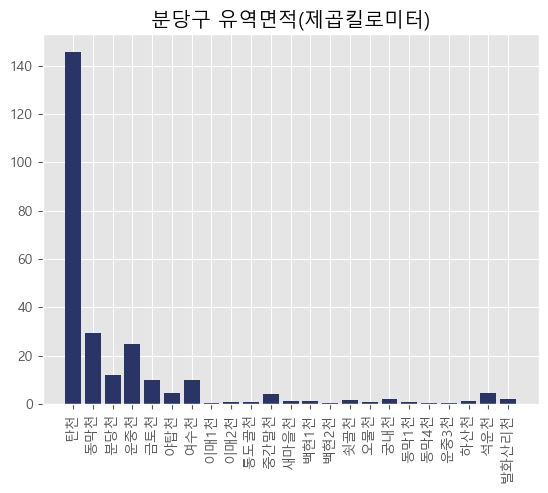

In [93]:
plt.style.use('ggplot')
plt.bar(bundang_liver["하천명"], bundang_liver["유역_면적(제곱킬로미터)"],color='#2B3467')
plt.xticks(rotation=90)
plt.title('분당구 유역면적(제곱킬로미터)')
plt.show()

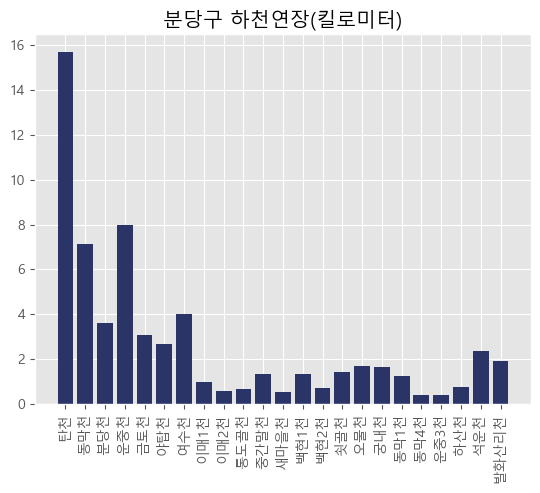

In [97]:
plt.bar(bundang_liver["하천명"], bundang_liver["하천연장(킬로미터)"], color='#2B3467')
plt.xticks(rotation=90)
plt.title('분당구 하천연장(킬로미터)')
plt.show()

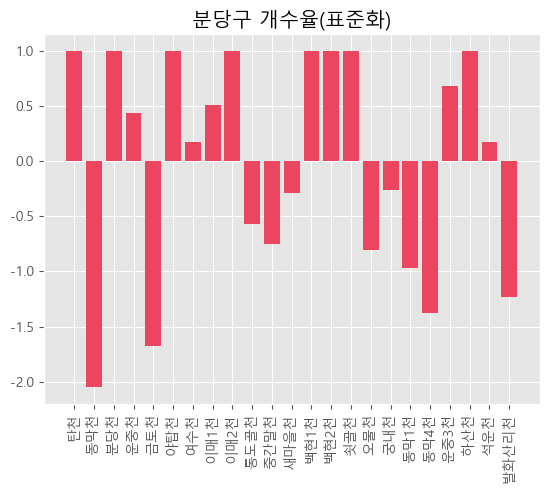

In [98]:
plt.bar(bundang_liver["하천명"], bundang_liver["표준화_개수율"], color='#EB455F')
plt.xticks(rotation=90)
plt.title('분당구 개수율(표준화)')
plt.show()

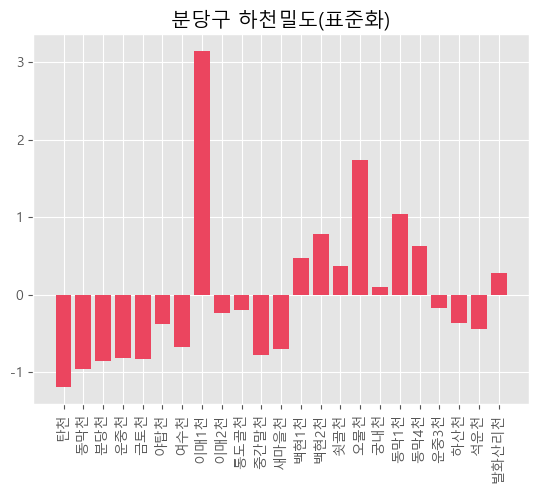

In [96]:
plt.bar(bundang_liver["하천명"], bundang_liver["표준화_하천밀도"], color='#EB455F')
plt.xticks(rotation=90)
plt.title('분당구 하천밀도(표준화)')
plt.show()

In [64]:
sujeong_liver = pd.read_csv("sujeong_liver.csv")
sujeong_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,탄천,145.74,15.700,100.0,0.107726,0.928618,-1.340172
1,금토천,9.77,3.070,37.1,0.314227,-1.411188,-0.596336
2,상적천,11.04,2.540,100.0,0.230072,0.928618,-0.899469
3,창곡천,4.76,2.677,100.0,0.562395,0.928618,0.297587
4,복우천,1.68,0.350,100.0,0.208333,0.928618,-0.977776
5,심곡천,0.98,0.748,54.5,0.763265,-0.763929,1.021141
6,등자천,1.04,0.700,48.1,0.673077,-1.002001,0.696274
7,상적천,5.23,1.780,87.1,0.340344,0.448753,-0.502260
8,시흥천,2.39,2.100,54.5,0.878661,-0.763929,1.436808
9,외동천,2.67,2.300,100.0,0.861423,0.928618,1.374715


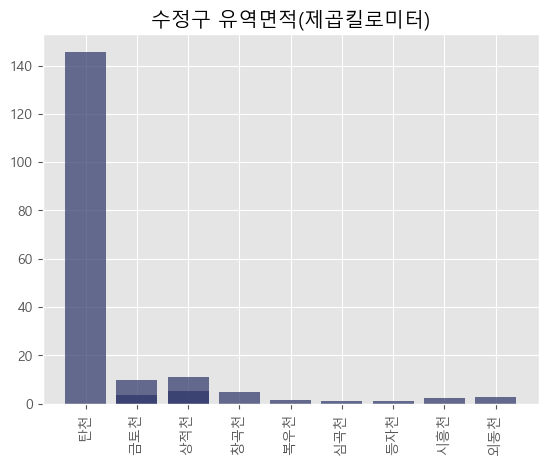

In [99]:
plt.bar(sujeong_liver["하천명"], sujeong_liver["유역_면적(제곱킬로미터)"], alpha=0.7, color='#2B3467')
plt.xticks(rotation=90)
plt.title('수정구 유역면적(제곱킬로미터)')
plt.show()

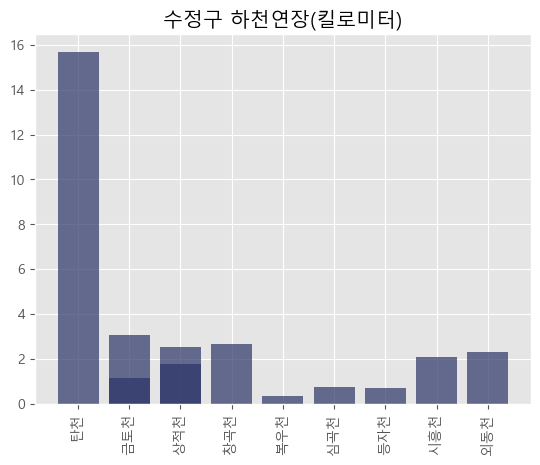

In [100]:
plt.bar(sujeong_liver["하천명"], sujeong_liver["하천연장(킬로미터)"], alpha=0.7, color='#2B3467')
plt.xticks(rotation=90)
plt.title('수정구 하천연장(킬로미터)')
plt.show()

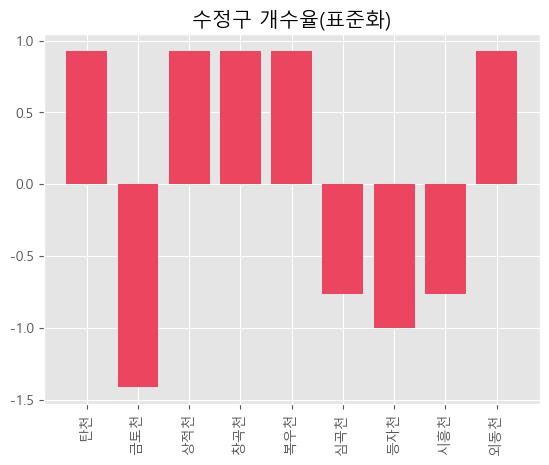

In [101]:
plt.bar(sujeong_liver["하천명"], sujeong_liver["표준화_개수율"], color='#EB455F')
plt.xticks(rotation=90)
plt.title('수정구 개수율(표준화)')
plt.show()

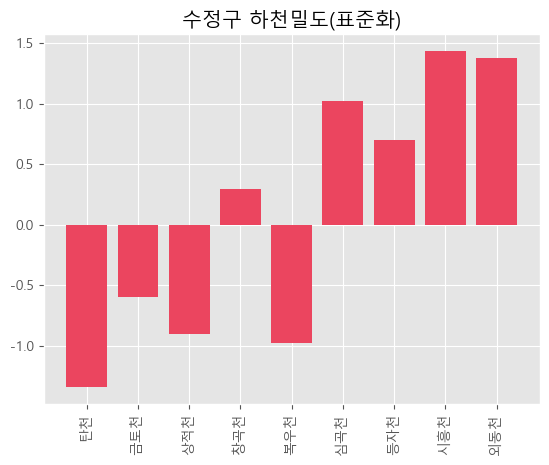

In [102]:
plt.bar(sujeong_liver["하천명"], sujeong_liver["표준화_하천밀도"], color='#EB455F')
plt.xticks(rotation=90)
plt.title('수정구 하천밀도(표준화)')
plt.show()

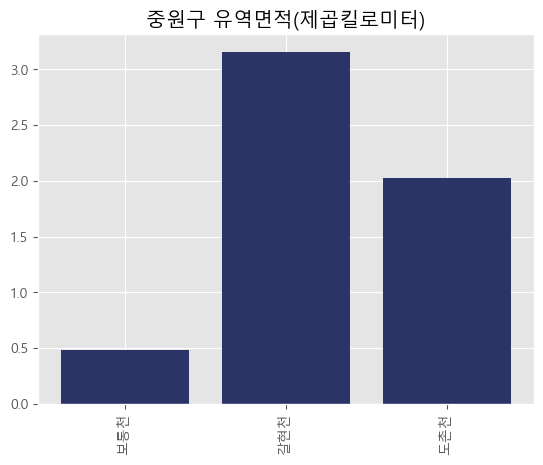

In [103]:
plt.bar(jungwon_liver["하천명"], jungwon_liver["유역_면적(제곱킬로미터)"], color='#2B3467')
plt.xticks(rotation=90)
plt.title('중원구 유역면적(제곱킬로미터)')
plt.show()

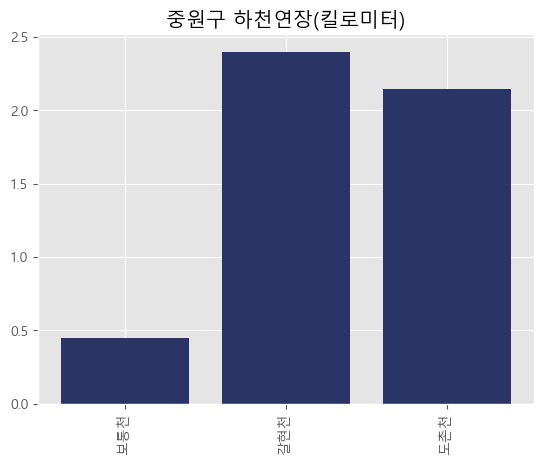

In [104]:
plt.bar(jungwon_liver["하천명"], jungwon_liver["하천연장(킬로미터)"], color='#2B3467')
plt.xticks(rotation=90)
plt.title('중원구 하천연장(킬로미터)')
plt.show()

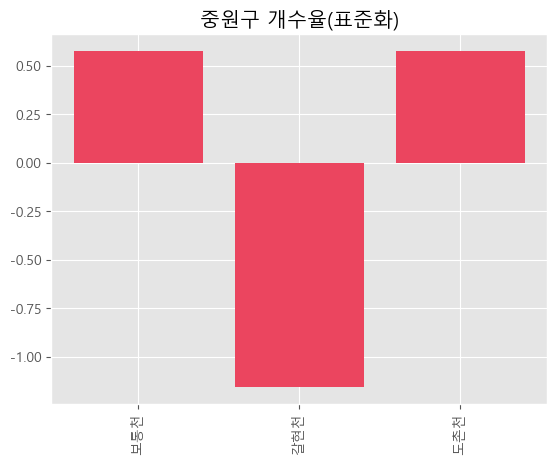

In [105]:
plt.bar(jungwon_liver["하천명"], jungwon_liver["표준화_개수율"], color='#EB455F')
plt.xticks(rotation=90)
plt.title('중원구 개수율(표준화)')
plt.show()

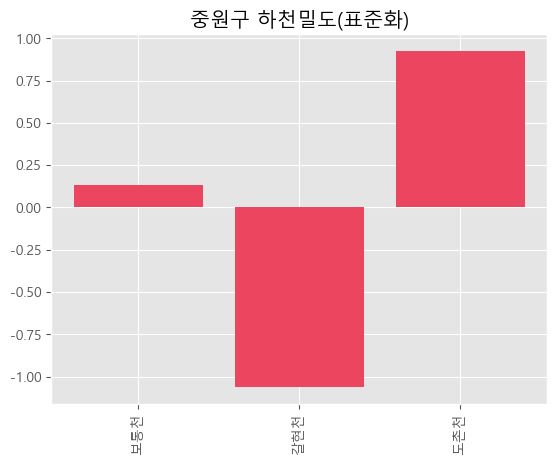

In [106]:
plt.bar(jungwon_liver["하천명"], jungwon_liver["표준화_하천밀도"], color='#EB455F')
plt.xticks(rotation=90)
plt.title('중원구 하천밀도(표준화)')
plt.show()

In [5]:
bundang_liver = bundang_liver.loc[:,('하천명','유역_면적(제곱킬로미터)','하천연장(킬로미터)','개수율')]
bundang_liver['하천밀도']=bundang_liver.loc[:,'하천연장(킬로미터)']/bundang_liver.loc[:,'유역_면적(제곱킬로미터)']
bundang_liver['표준화_개수율']=(bundang_liver['개수율']-bundang_liver['개수율'].mean())/bundang_liver['개수율'].std()
bundang_liver['표준화_하천밀도']=(bundang_liver['하천밀도']-bundang_liver['하천밀도'].mean())/bundang_liver['하천밀도'].std()
bundang_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,탄천,145.74,15.700,100.0,0.107726,0.998679,-1.189959
1,동막천,29.34,7.120,28.3,0.242672,-2.048919,-0.956108
2,분당천,11.89,3.620,100.0,0.304458,0.998679,-0.849038
3,운중천,24.91,8.000,86.7,0.321156,0.433365,-0.820101
4,금토천,9.77,3.070,37.1,0.314227,-1.674876,-0.832108
5,야탑천,4.65,2.690,100.0,0.578495,0.998679,-0.374153
6,여수천,9.85,4.030,80.6,0.409137,0.174085,-0.667637
7,이매1천,0.38,0.991,88.6,2.607895,0.514124,3.142641
8,이매2천,0.87,0.571,100.0,0.656322,0.998679,-0.239284
9,통도골천,0.97,0.663,63.2,0.683505,-0.565499,-0.192178


In [35]:
bundang_liver.to_csv("bundang_liver.csv", index = False)

In [6]:
jungwon_liver = jungwon_liver.loc[:,('하천명','유역_면적(제곱킬로미터)','하천연장(킬로미터)','개수율')]
jungwon_liver['하천밀도']=jungwon_liver.loc[:,'하천연장(킬로미터)']/jungwon_liver.loc[:,'유역_면적(제곱킬로미터)']
jungwon_liver['표준화_개수율']=(jungwon_liver['개수율']-jungwon_liver['개수율'].mean())/jungwon_liver['개수율'].std()
jungwon_liver['표준화_하천밀도']=(jungwon_liver['하천밀도']-jungwon_liver['하천밀도'].mean())/jungwon_liver['하천밀도'].std()
jungwon_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,보통천,0.48,0.450,100.0,0.937500,0.577350,0.135101
1,갈현천,3.16,2.400,78.3,0.759494,-1.154701,-1.060682
2,도촌천,2.03,2.142,100.0,1.055172,0.577350,0.925582


In [37]:
jungwon_liver.to_csv("jungwon_liver.csv", index = False)

In [7]:
sujeong_liver = sujeong_liver.loc[:,('하천명','유역_면적(제곱킬로미터)','하천연장(킬로미터)','개수율')]
sujeong_liver['하천밀도']=sujeong_liver.loc[:,'하천연장(킬로미터)']/sujeong_liver.loc[:,'유역_면적(제곱킬로미터)']
sujeong_liver['표준화_개수율']=(sujeong_liver['개수율']-sujeong_liver['개수율'].mean())/sujeong_liver['개수율'].std()
sujeong_liver['표준화_하천밀도']=(sujeong_liver['하천밀도']-sujeong_liver['하천밀도'].mean())/sujeong_liver['하천밀도'].std()
sujeong_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도
0,탄천,145.74,15.700,100.0,0.107726,0.928618,-1.340172
1,금토천,9.77,3.070,37.1,0.314227,-1.411188,-0.596336
2,상적천,11.04,2.540,100.0,0.230072,0.928618,-0.899469
3,창곡천,4.76,2.677,100.0,0.562395,0.928618,0.297587
4,복우천,1.68,0.350,100.0,0.208333,0.928618,-0.977776
5,심곡천,0.98,0.748,54.5,0.763265,-0.763929,1.021141
6,등자천,1.04,0.700,48.1,0.673077,-1.002001,0.696274
7,상적천,5.23,1.780,87.1,0.340344,0.448753,-0.502260
8,시흥천,2.39,2.100,54.5,0.878661,-0.763929,1.436808
9,외동천,2.67,2.300,100.0,0.861423,0.928618,1.374715


In [39]:
sujeong_liver.to_csv("sujeong_liver.csv", index = False)

In [8]:
bundang_liver['위치'] = '분당구'
jungwon_liver['위치'] = '중원구'
sujeong_liver['위치'] = '수원구'

In [9]:
all_liver = pd.concat([bundang_liver,jungwon_liver,sujeong_liver], axis=0 )
all_liver

,하천명,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도,표준화_개수율,표준화_하천밀도,위치
0,탄천,145.74,15.700,100.0,0.107726,0.998679,-1.189959,분당구
1,동막천,29.34,7.120,28.3,0.242672,-2.048919,-0.956108,분당구
2,분당천,11.89,3.620,100.0,0.304458,0.998679,-0.849038,분당구
3,운중천,24.91,8.000,86.7,0.321156,0.433365,-0.820101,분당구
4,금토천,9.77,3.070,37.1,0.314227,-1.674876,-0.832108,분당구
5,야탑천,4.65,2.690,100.0,0.578495,0.998679,-0.374153,분당구
6,여수천,9.85,4.030,80.6,0.409137,0.174085,-0.667637,분당구
7,이매1천,0.38,0.991,88.6,2.607895,0.514124,3.142641,분당구
8,이매2천,0.87,0.571,100.0,0.656322,0.998679,-0.239284,분당구
9,통도골천,0.97,0.663,63.2,0.683505,-0.565499,-0.192178,분당구


In [42]:
corr_df = pd.DataFrame(all_liver[['유역_면적(제곱킬로미터)', '하천연장(킬로미터)', '개수율', '하천밀도']].corr(method='spearman'))
corr_df

,유역_면적(제곱킬로미터),하천연장(킬로미터),개수율,하천밀도
유역_면적(제곱킬로미터),1.000000,0.885746,0.023195,-0.788285
하천연장(킬로미터),0.885746,1.000000,0.014114,-0.474773
개수율,0.023195,0.014114,1.000000,-0.033012
하천밀도,-0.788285,-0.474773,-0.033012,1.000000


Text(0.5, 1.0, '시군구별 하천밀도 박스플롯')

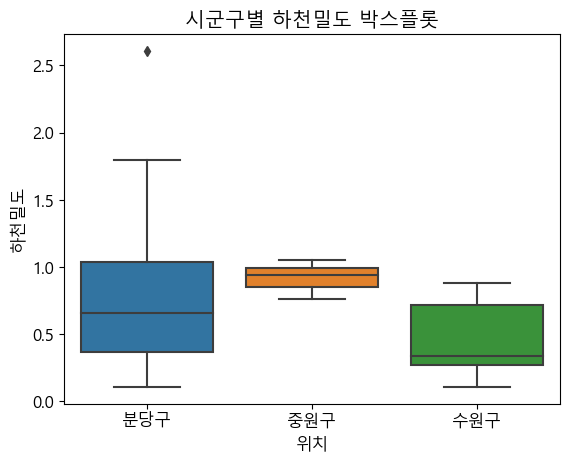

In [43]:
# Grouped boxplots by seaborn
import seaborn as sns

ax = sns.boxplot(x="위치", 

            y="하천밀도", 

            data=all_liver)
ax.set_title('시군구별 하천밀도 박스플롯')

Text(0.5, 1.0, '시군구별 개수율 박스플롯')

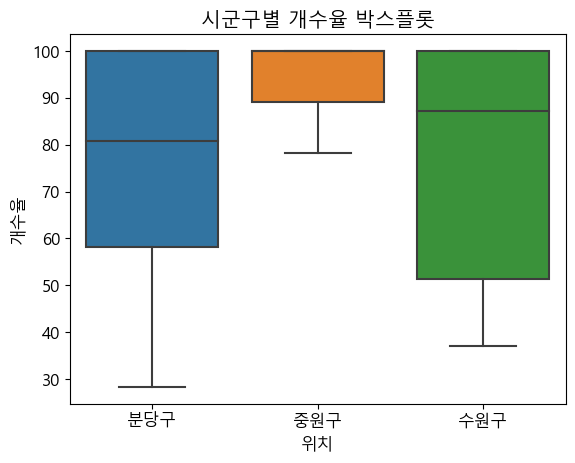

In [44]:
ax = sns.boxplot(x="위치", 

            y="개수율", 

            data=all_liver)
ax.set_title('시군구별 개수율 박스플롯')

In [30]:
all_liver['개수율'].mean()

77.38648648648648

In [31]:
bundang_liver['개수율'].mean()

76.50434782608696

In [11]:
df_gu3 = pd.read_csv("df_gu3.csv")
df_gu3

,SIG_KOR_NM,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),하천수,면적대비하천비율(%),개수율평균,하천밀도평균,탄천시설물비율
0,성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,23,32.965458,76.504348,0.794403,0.042855
1,성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,4,15.145778,92.766667,0.917389,0.000000
2,성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,11,24.202420,75.036364,0.479780,0.022002


In [12]:
df_gu3['개수율평균']= [bundang_liver['개수율'].mean(),jungwon_liver['개수율'].mean(),sujeong_liver['개수율'].mean()]
df_gu3

,SIG_KOR_NM,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),하천수,면적대비하천비율(%),개수율평균,하천밀도평균,탄천시설물비율
0,성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,23,32.965458,76.504348,0.794403,0.042855
1,성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,4,15.145778,92.766667,0.917389,0.000000
2,성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,11,24.202420,75.036364,0.479780,0.022002


In [47]:
df_gu3['하천밀도평균']= [bundang_liver['하천밀도'].mean(),jungwon_liver['하천밀도'].mean(),sujeong_liver['하천밀도'].mean()]
df_gu3

,SIG_KOR_NM,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),탄천시설물비율(%),주택수,하천수,면적대비하천비율(%),탄천시설물면적(m_2),개수율평균,하천밀도평균,하천밀도(%)평균
0,성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,4.28551,175223,23,32.965458,2990,76.504348,0.794403,79.440324
1,성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,0.00000,81003,4,15.145778,0,92.766667,0.917389,91.738869
2,성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,2.20022,96262,11,24.202420,1000,75.036364,0.479780,47.977981


In [23]:
df_gu3['탄천시설물비율'] = df_gu3['탄천시설물비율(%)']/100
df_gu3

,SIG_KOR_NM,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),탄천시설물비율(%),주택수,하천수,면적대비하천비율(%),탄천시설물면적(m_2),개수율평균,하천밀도평균,탄천시설물비율
0,성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,4.28551,175223,23,32.965458,2990,76.504348,0.794403,0.042855
1,성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,0.00000,81003,4,15.145778,0,92.766667,0.917389,0.000000
2,성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,2.20022,96262,11,24.202420,1000,75.036364,0.479780,0.022002


In [24]:
df_gu3 = df_gu3.drop(["탄천시설물비율(%)","탄천시설물면적(m_2)","주택수"], axis = 'columns')

In [25]:
df_gu3

,SIG_KOR_NM,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),하천수,면적대비하천비율(%),개수율평균,하천밀도평균,탄천시설물비율
0,성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,23,32.965458,76.504348,0.794403,0.042855
1,성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,4,15.145778,92.766667,0.917389,0.000000
2,성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,11,24.202420,75.036364,0.479780,0.022002


In [26]:
df_gu3.to_csv("df_gu3.csv", index = False)

In [13]:
import geopandas as gpd
geo_data = gpd.read_file('성남시.geojson', 
                        encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
geo_data

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,41131,"Sujeong-gu, Seongnam-si",성남시 수정구,"MULTIPOLYGON (((968165.51475 1941710.49569, 96..."
1,41133,"Jungwon-gu, Seongnam-si",성남시 중원구,"MULTIPOLYGON (((971787.03669 1941627.34825, 97..."
2,41135,"Bundang-gu, Seongnam-si",성남시 분당구,"MULTIPOLYGON (((962459.28814 1933176.51757, 96..."


In [28]:
mer = pd.merge(df_gu3, geo_data)
mer = gpd.GeoDataFrame(mer, geometry=mer['geometry'])

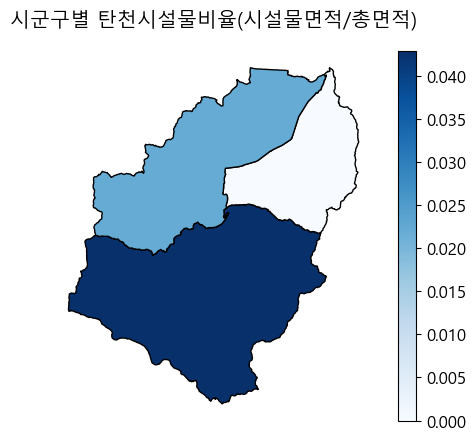

In [29]:
ax = mer.plot(column='탄천시설물비율', legend=True,cmap="Blues", edgecolor="k")
ax.set_title("시군구별 탄천시설물비율(시설물면적/총면적)")
ax.set_axis_off()
plt.show()

In [45]:
df_gu3

,SIG_KOR_NM,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),하천수,면적대비하천비율(%),개수율평균,하천밀도평균,탄천시설물비율
0,성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,23,32.965458,76.504348,0.794403,0.042855
1,성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,4,15.145778,92.766667,0.917389,0.000000
2,성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,11,24.202420,75.036364,0.479780,0.022002


In [14]:
correl_stat = df_gu3.set_index('SIG_KOR_NM')
correl_stat

,총 인구수,배수펌프장수,응급의료기관수,수난사고발생수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),하천수,면적대비하천비율(%),개수율평균,하천밀도평균,탄천시설물비율
SIG_KOR_NM,,,,,,,,,,,,,
성남시 분당구,478796.0,0,4,2,52820.0,0.110318,69.77,6862.491042,23,32.965458,76.504348,0.794403,0.042855
성남시 중원구,214304.0,0,1,0,20556.0,0.095920,26.41,8114.502083,4,15.145778,92.766667,0.917389,0.000000
성남시 수정구,230244.0,3,2,1,22165.0,0.096267,45.45,5065.874587,11,24.202420,75.036364,0.479780,0.022002


In [67]:
correl_stat.columns 

Index(['총 인구수', '배수펌프장수', '응급의료기관수', '수난사고발생수', '재난취약자수', '재난취약자수비율',
       '면적(km_2)', '인구밀도(수/면적)', '하천수', '면적대비하천비율(%)', '개수율평균', '하천밀도평균',
       '탄천시설물비율'],
      dtype='object')

In [15]:
corr_df = pd.DataFrame(df_gu3[['총 인구수', '배수펌프장수', '재난취약자수', '재난취약자수비율',
       '면적(km_2)', '인구밀도(수/면적)', '하천수', '면적대비하천비율(%)', '개수율평균', '하천밀도평균',
       '탄천시설물비율']].corr(method='spearman'))
corr_df

,총 인구수,배수펌프장수,재난취약자수,재난취약자수비율,면적(km_2),인구밀도(수/면적),하천수,면적대비하천비율(%),개수율평균,하천밀도평균,탄천시설물비율
총 인구수,1.0,0.000000,1.0,1.0,1.0,-0.500000,1.0,1.0,-0.500000,-0.500000,1.0
배수펌프장수,0.0,1.000000,0.0,0.0,0.0,-0.866025,0.0,0.0,-0.866025,-0.866025,0.0
재난취약자수,1.0,0.000000,1.0,1.0,1.0,-0.500000,1.0,1.0,-0.500000,-0.500000,1.0
재난취약자수비율,1.0,0.000000,1.0,1.0,1.0,-0.500000,1.0,1.0,-0.500000,-0.500000,1.0
면적(km_2),1.0,0.000000,1.0,1.0,1.0,-0.500000,1.0,1.0,-0.500000,-0.500000,1.0
인구밀도(수/면적),-0.5,-0.866025,-0.5,-0.5,-0.5,1.000000,-0.5,-0.5,1.000000,1.000000,-0.5
하천수,1.0,0.000000,1.0,1.0,1.0,-0.500000,1.0,1.0,-0.500000,-0.500000,1.0
면적대비하천비율(%),1.0,0.000000,1.0,1.0,1.0,-0.500000,1.0,1.0,-0.500000,-0.500000,1.0
개수율평균,-0.5,-0.866025,-0.5,-0.5,-0.5,1.000000,-0.5,-0.5,1.000000,1.000000,-0.5
하천밀도평균,-0.5,-0.866025,-0.5,-0.5,-0.5,1.000000,-0.5,-0.5,1.000000,1.000000,-0.5


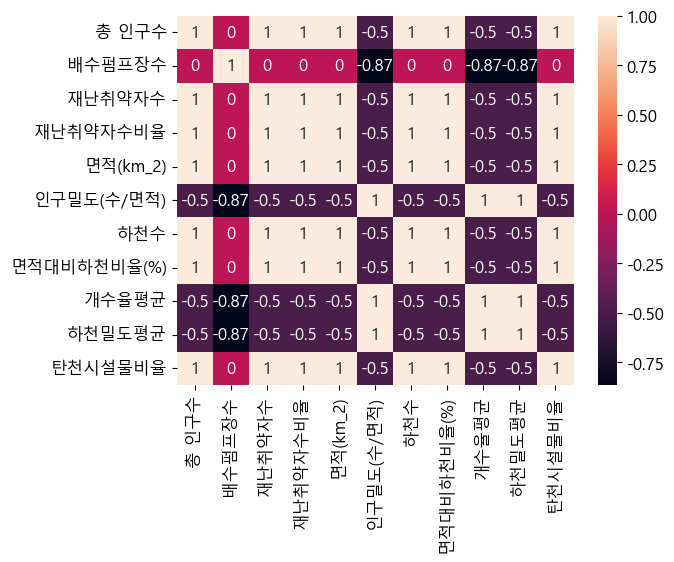

In [17]:
import seaborn as sns
sns.heatmap(corr_df, annot=True) #숫자 출력
plt.show() 

In [ ]:
df_bundang = df10[df10['구'] == '분당구'].iloc[0,4:]
df_bundang = df_bundang.to_frame()